In [2]:
import numpy as np
from matplotlib import pyplot as plt


In [12]:
################# THIS IS WHERE YOU CHOOSE WHAT TO LOAD ################################

correlation_cut = -1.0   # if negative none, current other options are 0.9 and 0.8, but more can be added

cut_version = -1   # -1 means OG, otherwise can be 2 or 3 (or more if added)

event_type = "ee"  # could be ee, emu, mumu

weight_cmd = "true"   # could also be "false", "true" or "no-neg"

drop = 0.0  # drop rate

input_type = "lorentzdelta_gen"

qg_cmd = False

batch_size = 7000

layer_number = "five"
layer_num_type = "more"

#This is only here in case format is changed... should be good for all three layer stuff otherwise
if layer_number != "GNN":
    model_name = layer_number + "LayerModel_" + event_type + "_corrCut_" + str(correlation_cut) + "_weights_" + weight_cmd + "_drop_" + str(drop)
else:
    model_name = layer_number + "_Model_" + event_type + "_corrCut_" + str(correlation_cut) + "_weights_" + weight_cmd + "_drop_" + str(drop) 
    
if cut_version > 0:
    model_name += "cutV" + str(cut_version)

if input_type != "all":
    model_name += "_" + input_type
    
if not qg_cmd:
    model_name += "_no_qg"
    
if batch_size != -1:
    model_name += "batch_" + str(batch_size)
    
model_name +="_layerordergood"
model_name += "_upsample"
    
# if batch_size != -1:
#     model_name += "batch_" + str(batch_size)

In [13]:
model_name

'fiveLayerModel_ee_corrCut_-1.0_weights_true_drop_0.0_lorentzdelta_gen_no_qgbatch_7000_layerordergood_upsample'

In [14]:
path = "/depot/cms/top/mcnama20/TopSpinCorr-Run2-Entanglement/CMSSW_10_2_22/src/TopAnalysis/Configuration/analysis/diLeptonic/entanglement_classifier"

In [15]:
validation = np.load(path + "/data/" + layer_num_type + "_layers/" + model_name + "_loss_val_array.npy")
train = np.load(path + "/data/" + layer_num_type + "_layers/" + model_name + "_loss_train_array.npy")

In [16]:
# validation = np.load("../data/" + layer_num_type + "_layers/" + model_name + "_loss_val_array.npy")
# train = np.load("../data/" + layer_num_type + "_layers/" + model_name + "_loss_train_array.npy")

In [17]:
print("epochs are " + str(10 * len(train)))

epochs are 1510


In [18]:
validation

array([ 0.55653113,  0.53639781,  0.52689123,  0.51894069,  0.51243991,
        0.50644094,  0.50143212,  0.49568525,  0.49124223,  0.48672813,
        0.48382619,  0.47871873,  0.47627452,  0.47310495,  0.46933156,
        0.46713957,  0.4643195 ,  0.46241274,  0.45905575,  0.45606223,
        0.45501137,  0.45202753,  0.45094341,  0.44760123,  0.44591519,
        0.44452477,  0.44446838,  0.44141915,  0.44055837,  0.43832758,
        0.43697625,  0.43660021,  0.43403602,  0.43209076,  0.43023589,
        0.42963293,  0.42762855,  0.42730749,  0.42436388,  0.4237175 ,
        0.42305604,  0.42033154,  0.42205125,  0.41981691,  0.41759029,
        0.41694105,  0.41583714,  0.4147242 ,  0.414076  ,  0.41330454,
        0.41219124,  0.41210273,  0.40985617,  0.41022745,  0.40961704,
        0.40933493,  0.40712512,  0.40664726,  0.40557575,  0.40457964,
        0.40497315,  0.4032484 ,  0.40284449,  0.40209416,  0.40058228,
        0.40063721,  0.39942139,  0.40037319,  0.39659572,  0.39

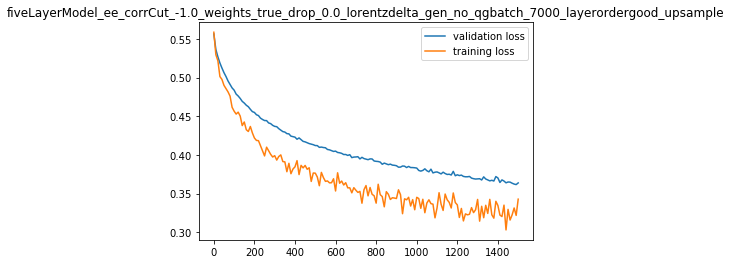

In [20]:
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(10 *np.array(range( len(validation))), validation, label = "validation loss")
ax.plot(10 *np.array(range(len(train))), train, label="training loss")
ax.legend()
plt.title(model_name)
# plt.yscale("log")
plt.show()

In [43]:
min(validation)

0.53605538606643677

In [ ]:

val = np.load("../data/" + layer_num_type + "_layers/train_val_datasets/validation_dataset_" + model_name + ".npy")